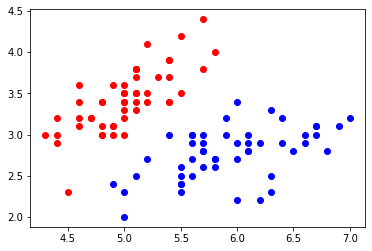

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

data=load_iris()
X=data.data[:,:2]
X=X[data.target<=1,:]
Y=data.target[data.target<=1]
Y[Y==0]=-1
trainX,testX,trainY,testY =train_test_split(X,Y)
standard=StandardScaler()
standard.fit(trainX)
trainX= standard.transform(trainX)
testX = standard.transform(testX)
plt.scatter(X[Y==-1,0],X[Y==-1,1],color='r')
plt.scatter(X[Y==1,0],X[Y==1,1],color='b')
plt.show()

In [4]:
# 感知机
class Perceptron:
    def __init__(self,max_iter=1000,alpha=1e-1):
        self.max_iter_=max_iter
        self.alpha=alpha
        self.theta=None
    def fit(self,trainX,trainY):
        X_b=np.hstack((trainX,np.ones((trainX.shape[0],1))))
        self.theta=np.ones(X_b.shape[1])
        # 随机梯度下降法
        for i in range(self.max_iter_):
            wrong_count=0
            for x_i in range(X_b.shape[0]):
                y=trainY[x_i]
                x=X_b[x_i]       
                if y *np.dot(x.T, self.theta)<0:
                    wrong_count+=1
                    self.theta = self.theta + self.alpha * np.dot(y, x)
            if wrong_count==0:
                    break             
    def loss_func(self,X,Y):
         return np.sum(abs((X.dot(self.theta)))) /np.linalg.norm(self.theta)
                
    def predict(self,testX):
        X_b=np.hstack((testX,np.ones((testX.shape[0],1))))
        result = np.array(X_b.dot(self.theta)>0,dtype='int')
        result[result==0]=-1
        return result
    def score(self,testX,testY):
        return np.sum(self.predict(testX) == testY)/len(testY)

clf = Perceptron()
clf.fit(trainX,trainY)
x_1=np.linspace(-2,2,100)
x_2=-(clf.theta[0]*x_1+clf.theta[2])/(clf.theta[1])
clf.score(testX,testY)


1.0

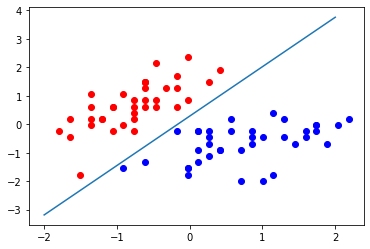

In [5]:
plt.plot(x_1, x_2)
plt.scatter(trainX[trainY==-1,0],trainX[trainY==-1,1],color='r')
plt.scatter(trainX[trainY==1,0],trainX[trainY==1,1],color='b')
plt.show()